 Import libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For date parsing and formatting
from datetime import datetime

Load the data

In [16]:
df = pd.read_csv("../data/BrentOilPrices.csv", parse_dates=["Date"], dayfirst=True)
df = df.sort_values("Date")
df.set_index("Date", inplace=True)

print(df.head())

C:\Users\Mesfin\AppData\Local\Temp\ipykernel_12032\1359600681.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/BrentOilPrices.csv", parse_dates=["Date"], dayfirst=True)


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


In [17]:
# check for missing values
missing_values = df.isnull().sum()
missing_values

Price    0
dtype: int64

Basic Time Series Visualization

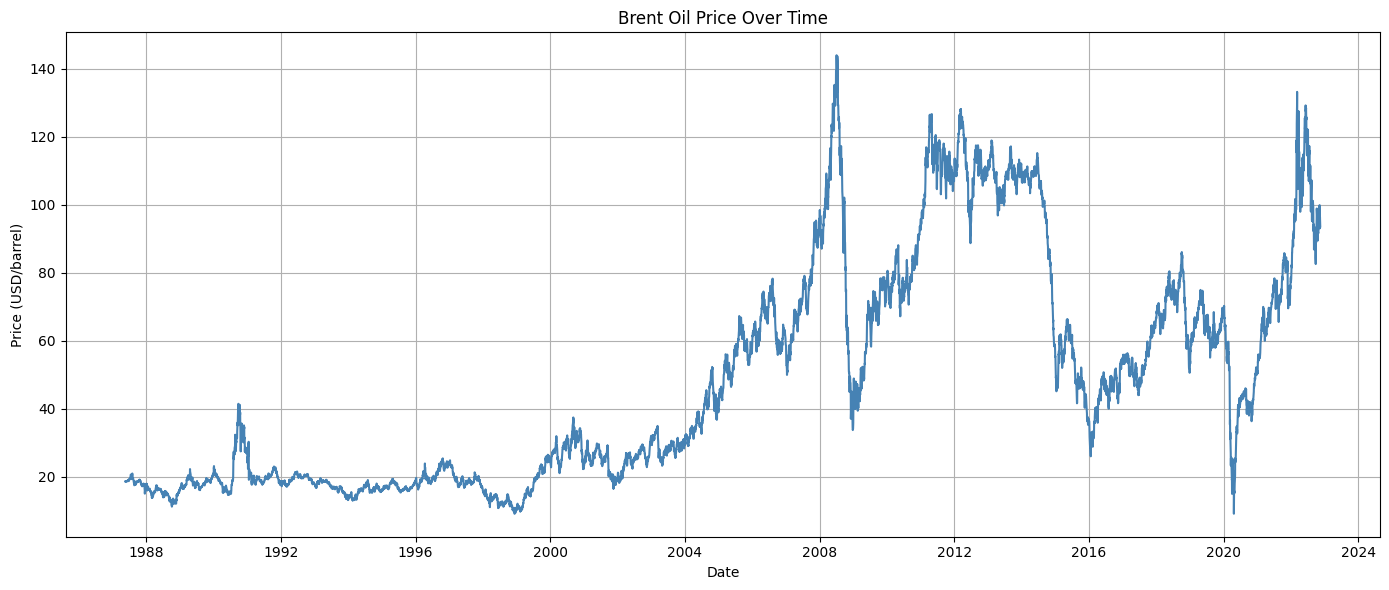

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Price"], color="steelblue")
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.grid(True)
plt.tight_layout()
plt.show()

Log Return Calculation

In [21]:
df["LogReturn"] = np.log(df["Price"] / df["Price"].shift(1))
df.dropna(inplace=True)

Plot Log Returns

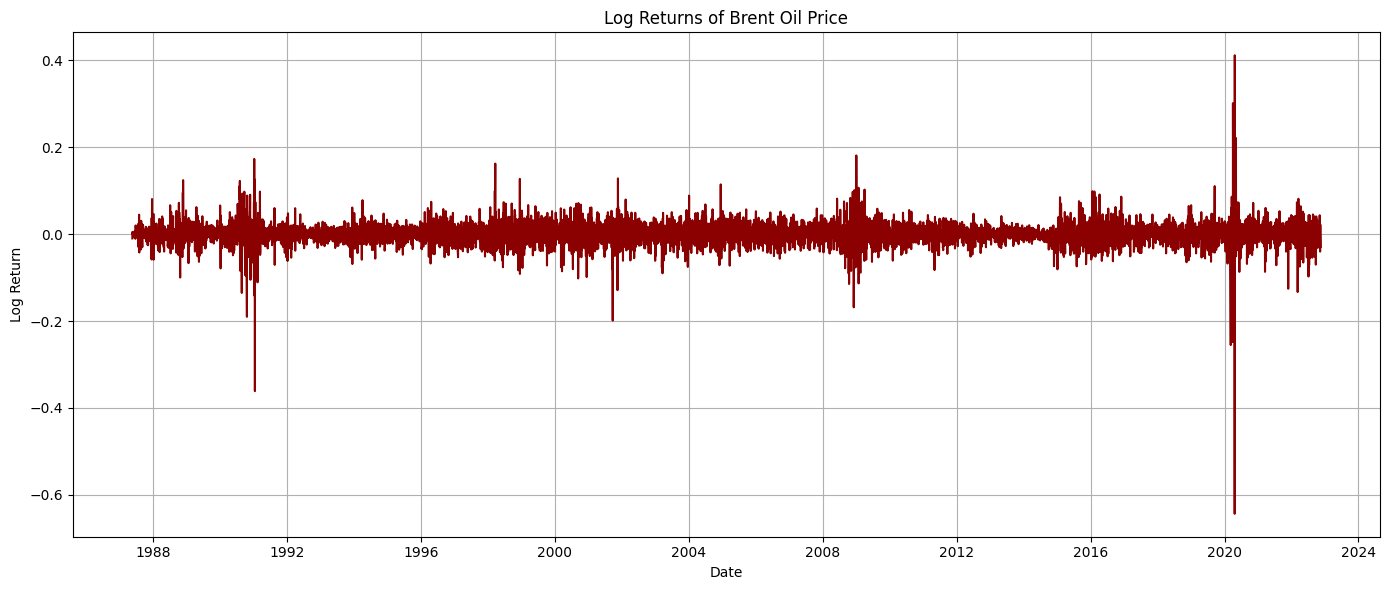

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["LogReturn"], color="darkred")
plt.title("Log Returns of Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
df.head()

,Price,LogReturn
Date,,
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
1987-05-27,18.60,-0.001612


Stationarity Check (Optional for extra rigor)

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["LogReturn"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -16.427113494485795
p-value: 2.4985801611433715e-29


Summary Stats & Distribution

count    9010.000000
mean        0.000179
std         0.025532
min        -0.643699
25%        -0.011154
50%         0.000402
75%         0.012127
max         0.412023
Name: LogReturn, dtype: float64


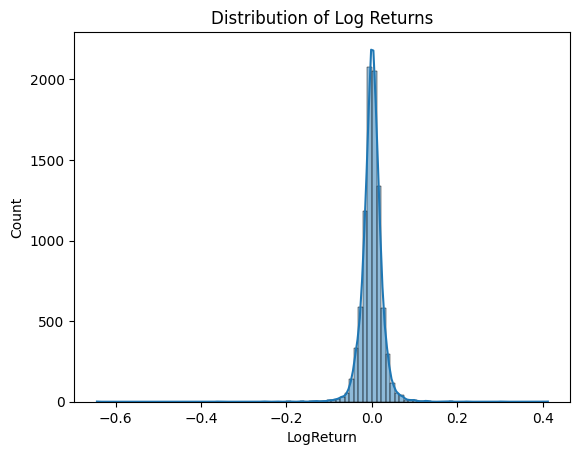

In [24]:
print(df["LogReturn"].describe())

sns.histplot(df["LogReturn"], bins=100, kde=True)
plt.title("Distribution of Log Returns")
plt.show()

key_events.csv is loaded and formatted correctly

In [25]:
events_df = pd.read_csv("../data/key_events.csv", parse_dates=["date"])

📊 Plot Log Returns with Vertical Event Lines

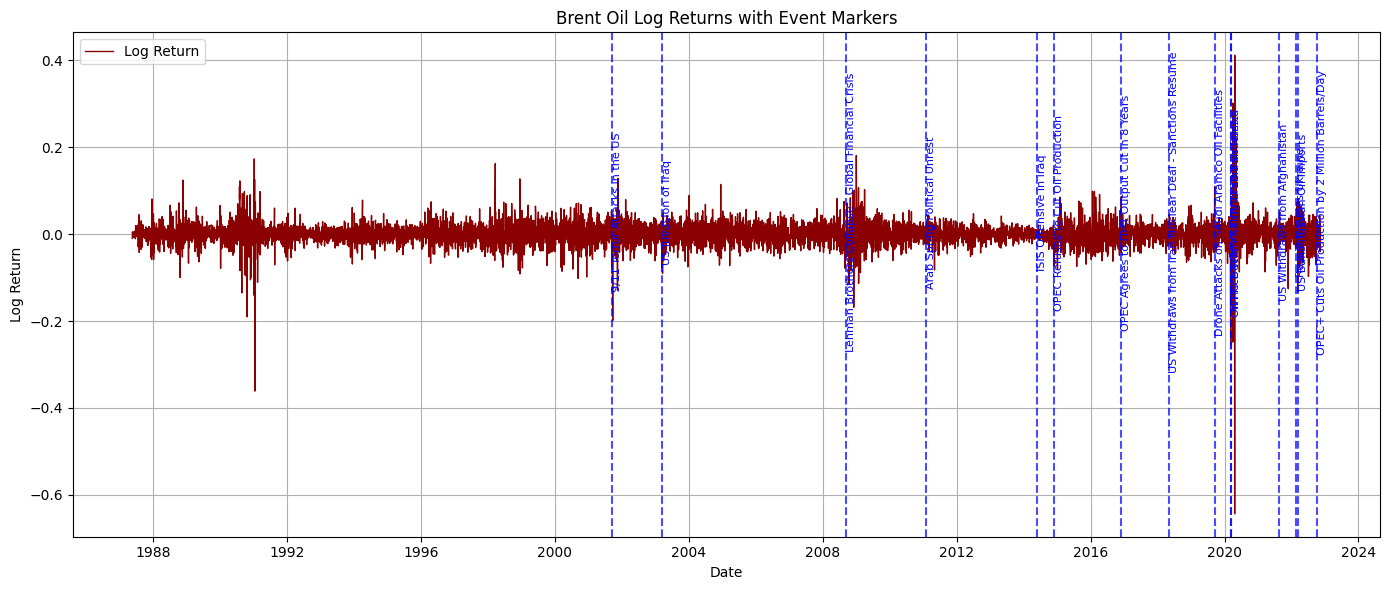

In [28]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["LogReturn"], label="Log Return", color="darkred", linewidth=1)

# Add event markers
for _, row in events_df.iterrows():
    plt.axvline(x=row["date"], color="blue", linestyle="--", alpha=0.7)
    plt.text(row["date"], 0.05, row["event"], rotation=90, verticalalignment='center', fontsize=8, color="blue")

plt.title("Brent Oil Log Returns with Event Markers")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("../figures/brent_log_returns_with_events.png")
plt.show()